<a href="https://colab.research.google.com/github/spdr-lily/modelagem-dimensional-de-dados-de-um-supermercado/blob/main/modelagem_dimensional_supermercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Cubo de Dados para Análise
Construção de um cubo de dados tridimensional, utilizando a biblioteca Pandas para manipular e analisar os dados, com uma base de dados de um supermercado hipotético.

In [7]:
# importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# dados simulados de vendas de supermercados
data = {
    'id_fatura': [1, 2, 3, 4, 5],
    'filial': ['A', 'B', 'A', 'B', 'A'],
    'tipo_cliente': ['Membro', 'Normal', 'Normal', 'Membro', 'Membro'],
    'genero': ['Masculino', 'Feminino', 'Masculino', 'Feminino', 'Masculino'],
    'linha_produto': ['Alimentos', 'Eletrônicos', 'Limpeza', 'Higiene', 'Alimentos'],
    'preco_unitario': [10.0, 5.0, 15.0, 8.0, 12.0],
    'quantidade': [3, 2, 1, 4, 2],
    'total': [30.0, 10.0, 15.0, 32.0, 24.0],
    'custo_produtos_vendidos': [50, 40, 22, 50, 110],
    'margem_bruta': [2.5, 5.0, 2.0, 2.5, 10.0]
}

In [9]:
# criando DataFrame
vendas_df = pd.DataFrame(data)
print("DataFrame inicial:")
print(vendas_df)

DataFrame inicial:
   id_fatura filial tipo_cliente     genero linha_produto  preco_unitario  \
0          1      A       Membro  Masculino     Alimentos            10.0   
1          2      B       Normal   Feminino   Eletrônicos             5.0   
2          3      A       Normal  Masculino       Limpeza            15.0   
3          4      B       Membro   Feminino       Higiene             8.0   
4          5      A       Membro  Masculino     Alimentos            12.0   

   quantidade  total  custo_produtos_vendidos  margem_bruta  
0           3   30.0                       50           2.5  
1           2   10.0                       40           5.0  
2           1   15.0                       22           2.0  
3           4   32.0                       50           2.5  
4           2   24.0                      110          10.0  


In [10]:
# mapeando linhas de produtos para valores numéricos
linha_produto_map = {
    'Alimentos': 1,
    'Higiene': 2,
    'Limpeza': 3,
    'Eletrônicos': 4
}
vendas_df['produto_id'] = vendas_df['linha_produto'].map(linha_produto_map)

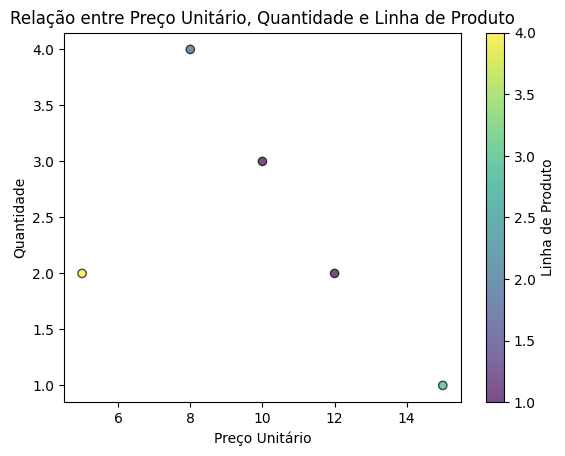

In [11]:
# criando scatter plot de relação entre preço unitário, quantidade e linha de produto
plt.scatter(vendas_df['preco_unitario'], vendas_df['quantidade'], c=vendas_df['produto_id'], cmap='viridis', alpha=0.7, edgecolors='k')
plt.xlabel('Preço Unitário')
plt.ylabel('Quantidade')
plt.title('Relação entre Preço Unitário, Quantidade e Linha de Produto')
plt.colorbar(label='Linha de Produto')
plt.show()

# Criando um cubo de dados utilizando Xarray para uma análise mais aprofundada

In [12]:
import xarray as xr

In [13]:
# convertendo o dataframe pandas em um DataArray xarray (cubo de dados)
data_array = vendas_df.set_index(['id_fatura', 'filial', 'tipo_cliente', 'genero', 'linha_produto']).to_xarray()
print("\nDataArray (cubo de dados):")
print(data_array)


DataArray (cubo de dados):
<xarray.Dataset> Size: 8kB
Dimensions:                  (id_fatura: 5, filial: 2, tipo_cliente: 2,
                              genero: 2, linha_produto: 4)
Coordinates:
  * id_fatura                (id_fatura) int64 40B 1 2 3 4 5
  * filial                   (filial) object 16B 'A' 'B'
  * tipo_cliente             (tipo_cliente) object 16B 'Membro' 'Normal'
  * genero                   (genero) object 16B 'Feminino' 'Masculino'
  * linha_produto            (linha_produto) object 32B 'Alimentos' ... 'Limp...
Data variables:
    preco_unitario           (id_fatura, filial, tipo_cliente, genero, linha_produto) float64 1kB ...
    quantidade               (id_fatura, filial, tipo_cliente, genero, linha_produto) float64 1kB ...
    total                    (id_fatura, filial, tipo_cliente, genero, linha_produto) float64 1kB ...
    custo_produtos_vendidos  (id_fatura, filial, tipo_cliente, genero, linha_produto) float64 1kB ...
    margem_bruta             (id_

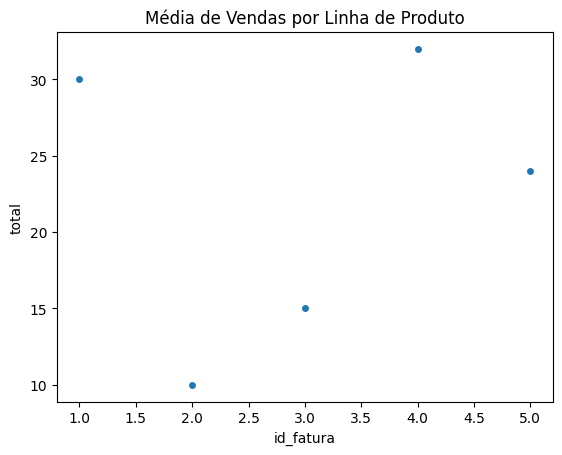

In [20]:
# visualizando média de vendas por linha de produto
mean_sales = data_array.mean(dim='linha_produto') #calculo da média
mean_sales.plot.scatter(x='id_fatura', y='total') # ajuste de x e y baseando no que se quer visualizar
plt.title('Média de Vendas por Linha de Produto')
plt.show()